# Computing gradients automatically with Tensorflow

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

## Least squares

Building a simple function in python

In [2]:
def square(array_in):
    return np.power(array_in, 2)

And applying it to some data and a two parameter model

In [3]:
n_samples = 1024
x = np.random.normal(0.0, 0.5, n_samples)
y = 2.5 * x + 2.5 + np.random.normal(0.0, 0.05, n_samples)

def loss(a, b):
    y_pred = a * x + b
    error = y - y_pred
    return np.mean(square(error))

Gives us a score representing how well the model is doing

In [4]:
loss(0.01, 0.4)

5.8672936732324095

And ideally we would like to decrease this score as much as possible

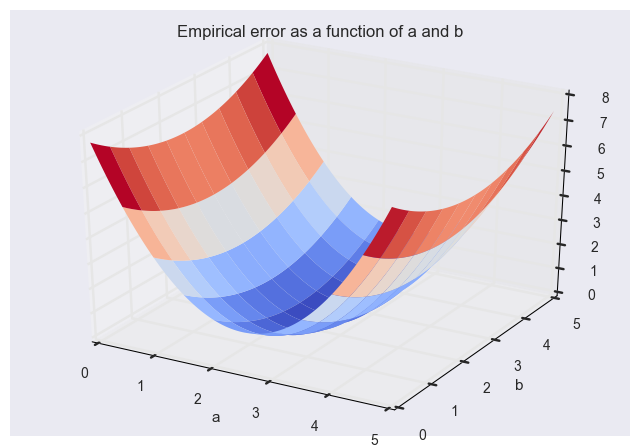

In [5]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

a_grid = np.arange(0.0, 5.0, 0.05)
b_grid = np.arange(0.0, 5.0, 0.05)
error_plot = np.asanyarray([[loss(a, b) 
                             for b in b_grid]
                            for a in a_grid])
A, B = np.meshgrid(a_grid, b_grid)

fig = plt.figure()
ax = fig.gca(projection='3d')

im = ax.plot_surface(A, B, error_plot, cmap=cm.coolwarm, linewidth=0)

plt.title('Empirical error as a function of a and b')
plt.xlabel('a')
plt.ylabel('b')
plt.show()

At any point in this 2D space, we can compute the sensitivity of the error with respect to the parameters a and b. This is called the gradient and is defined as the vector (dloss / da, dloss / db).

Write down the analytical expression for loss(a,b) and derive the corresponding gradient:

### YOUR ANSWER HERE
Write a function to compute the gradient as a pair of outpus

In [6]:
def loss_grad(a, b):
    #
    #  Your code here
    #

    #return (something, something)
    
    #
    #  Answer
    #
    y_pred = a * x + b
    error = y - y_pred
    return (-2.0 * np.mean(error * x), -2.0 * np.mean(error))

## Gradient Descent

The minizing (a, b) pair is the lowest point we can find on the 3d surface above. The most direct way of getting to the point is to follow a stepest descent approach.

The direction of steepest descent in a neighboring point of a continuously differentiable function is given by the gradient at then point.

We will follow the direction given by the gradient at our start point (a[0], b[0]), then recompute the gradient at the new point (a[1] = a[0] - epsilon * g_0, b[1] = b[0] - epsilon * g_1) where g_0 is the partial derivative of the loss function with respect to its first input and g_1 its partial derivative with respect to its second input.

Here, epsilon is our learning rate.

### YOUR ANSWER HERE
Update the old parameters a and b with a pre-computed gradient.

In [7]:
def new_params(a, b, learning_rate, gradient):
    #
    #   Your code here
    #

    #return (something, something)
    
    #
    #   Answer
    #
    return (a - learning_rate * gradient[0], b - learning_rate * gradient[1])

### YOUR ANSWER HERE

Code the gradient descent algorithm starting a parameter value (a_init, b_init).

The stopping criterion is sqaured_l2_norm(gradient) < precision * (1 + abs(loss)).

In [8]:
def gradient_descent(a_init, b_init, learning_rate, 
                     loss_eval_fct, gradient_eval_fct, 
                     precision=1e-4, MAX_STEPS=10000):
    #
    #    Your code here
    #
    
    #return (a_opt, b_opt, n_steps, trajectory, losses)
    
    #
    #    Answer
    #
    old_loss = loss_eval_fct(a_init, b_init)
    converged = False
    a = a_init
    b = b_init
    
    n_steps = 0
    trajectory = [(a_init, b_init)]
    losses = []
    
    while not converged:
        n_steps += 1
        
        gradient = gradient_eval_fct(a, b)
        
        a -= learning_rate * gradient[0]
        b -= learning_rate * gradient[1]
        
        new_loss = loss_eval_fct(a, b)
        converged = np.sum(np.array(gradient)**2) < precision * (1 + np.abs(new_loss))
        
        old_loss = new_loss
        
        trajectory.append((a, b))
        losses.append(old_loss)
        
        if n_steps > MAX_STEPS:
            print 'Warning: gradient descent did not converge'
            break
        
    return a, b, n_steps, trajectory, losses

We now apply the gradient descent algorithm to our initial least squares problem.

Optimum found (2.482, 2.501) in 49 steps of Gradient Descent.


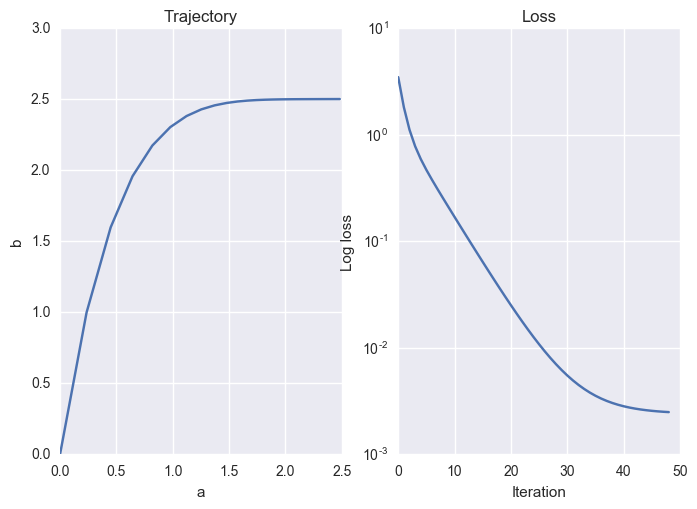

In [9]:
a_opt, b_opt, n_steps, trajectory, losses = gradient_descent(0.0, 0.0, 2e-1, loss, loss_grad)

print 'Optimum found (%.3f, %.3f) in %d steps of Gradient Descent.' % (a_opt, b_opt, n_steps)

plt.subplot(121)
plt.plot([param[0] for param in trajectory], [param[1] for param in trajectory])
plt.title('Trajectory')
plt.xlabel('a')
plt.ylabel('b')

plt.subplot(122)
plt.plot(losses)
plt.title('Loss')
plt.xlabel('Iteration')
plt.ylabel('Log loss')
plt.yscale('log')

plt.show()

a) What is the sensitivity of the run time with respect to your choice of initial values?

b) What is the sensitivity of the run time with respect to the precision?

c) What is the sensitivity of the run time with respect to the learning rate? 

d) What happens if the learning rate is very high? What happens if it's very low?

### YOUR ANSWERS HERE:

a)

b)

c)

d)

#### Answers:

a) Proportional to the log of the distance between initial values and optimum.

b) Proportional to the log of the precision.

c) It depends unfortunately...

d) If the learning rate is too high the algorithm diverges, it it's too low it takes more time to converge.

# Considering a random gradient

Instead of computing our gradient holistically, let us only focus on a few (x, y) pairs at the time.

The loss function we consider here is an empirical average obtained from hypothetically independent identically distributed samples. By linearity of the gradient, the gradient function here is also an average as well.

Using the Law of Great Numbers we can approximate this sum by a few samples randomly selected. This smaller collection of samples is called a batch and the number of samples we choose to represent our data set at each of step of the gradient descent.

The key insight here is that for the first steps of the gradient descent it is not very informative to carefully examine the value of the contributions to the gradient from each sample. We are most likely far from the optimum we seek anyway and therefore an imperfect vector indicating an approximation of the steepest descent direct is enough to get us closer to the optimum.

### YOUR ANSWER HERE

Write a random approximation of the gradient obtained by only selecting batch_size distinct samples uniformly at randnom.

First, write a function that selects batch_size distinct samples of corresponding x, y observations. And before we do that we shuffle the data set which can help enforce the iid assumption about our samples with datasets that may have similar data points clustered together.

In [10]:
permutation = np.random.choice(np.arange(n_samples), n_samples)

x = x[permutation]
y = y[permutation]

In [11]:
def collect_samples(offset, batch_size):
    #
    #   Your code here
    #
    
    # return numpy array for x, numpy array for y
    
    #
    #    Answer
    #
    selection = np.arange(offset, offset + batch_size) % n_samples
    return x[selection], y[selection]

Now write a similar function that estimates the gradient for a pair of parameter values as an empirical average over the elements of the batch.

In [12]:
def sampled_loss_grad(x_batch, y_batch, a, b):
    #
    #     Your code here
    #
    
    # return pair of scalars
    
    #
    #     Answer
    #
    y_pred_batch = a * x_batch + b
    error_batch = y_batch - y_pred_batch
    return (-2.0 * np.mean(error_batch * x_batch), -2.0 * np.mean(error_batch))

## Stochastic Gradient Descent

We now re-implement the gradient descent algorithm but with two major modifications:
    
    We use an approximate evaluation of the gradient of the loss function based on sample collections of length batch_size.
    
    We use the loss evaluated over the entire dataset as a stopping criterion, but we only compute it every evaluate_loss_every iterations. We stop when don't improve the global loss more than the prescribed precision.

In [13]:
def stochastic_gradient_descent(a_init, b_init, learning_rate, 
                                loss_eval_fct, sampled_gradient_eval_fct,
                                batch_size=8,
                                evaluate_loss_every=4, precision=1e-5, MAX_STEPS=10000):
    #
    #    Your code here
    #
    
    #return (a_opt, b_opt, n_steps, trajectory, losses)
    
    #
    #    Answer
    #
    old_loss = loss_eval_fct(a_init, b_init)
    converged = False
    a = a_init
    b = b_init
    
    n_steps = 0
    trajectory = [(a_init, b_init)]
    losses = []
    
    while not converged:
        n_steps += 1
        
        x_batch, y_batch = collect_samples(n_steps * batch_size, batch_size)
        
        gradient_estimate = sampled_gradient_eval_fct(x_batch, y_batch, a, b)
        
        a -= learning_rate * gradient_estimate[0]
        b -= learning_rate * gradient_estimate[1]
        
        if n_steps % evaluate_loss_every == 0:        
            new_loss = loss_eval_fct(a, b)
            converged = np.abs(new_loss - old_loss) < precision
        
            old_loss = new_loss
            losses.append(old_loss)
        
        trajectory.append((a, b))
        
        if n_steps > MAX_STEPS:
            print 'Warning: gradient descent did not converge'
            break
        
    return a, b, n_steps, trajectory, losses

We now apply the stochastic gradient descent algorithm to our initial least squares problem.

Optimum found (2.497, 2.502) in 96 steps of Stochatic gradient Descent.


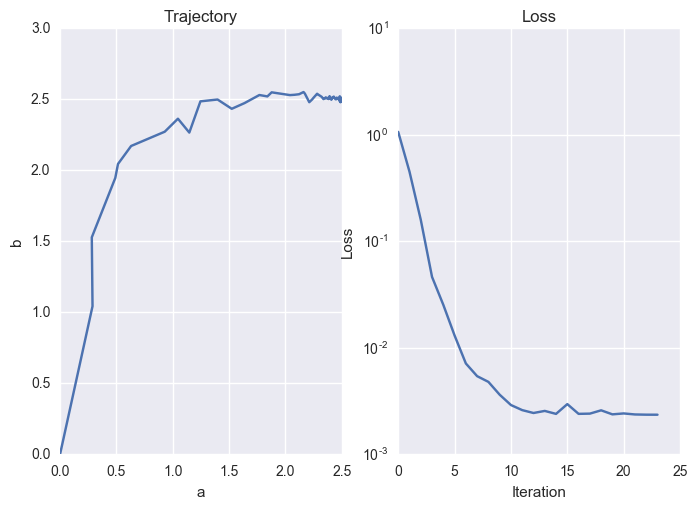

In [14]:
a_opt, b_opt, n_steps, trajectory, losses = stochastic_gradient_descent(0.0, 0.0, 2e-1, 
                                                                        loss, sampled_loss_grad)

print 'Optimum found (%.3f, %.3f) in %d steps of Stochatic gradient Descent.' % (a_opt, b_opt, n_steps)

plt.subplot(121)
plt.plot([param[0] for param in trajectory], [param[1] for param in trajectory])
plt.title('Trajectory')
plt.xlabel('a')
plt.ylabel('b')

plt.subplot(122)
plt.plot(losses)
plt.title('Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.yscale('log')

plt.show()

a) Compared to Gradient Descent, do we compute more or less iterations?

b) Compared to Gradient Descent, do we increase or decrease the run time?

c) What is the impact of the batch_size parameter on the smoothness of the trajectory? On the number of steps required to converge?

d) Give multiple tries to the algorithm, does the loss always decrease?

e) What is is the influence of the learning rate parameter?

### YOUR ANSWERS HERE:

a)

b)

c)

d)

e)

#### Answers:

a) More iterations.

b) More iterations that take less time, so faster.

c) The higher the batch size, the less variance we have in our estimate of the gradient, the smoother the trajectory. We take fewer (more expensive in time complexity) steps to converge.

d) The loss does not systematically descrease. This algorithm should be thought of as the "Stochastc Gradient Method".

e) With a higher learning rate we decrease the loss faster in the beginning but then it takes more time to stabilize and may bounce around the minimal loss. We may also simply diverge with too high a learning rate.

## Decaying learning rate

# Computing gradients automatically with Tensorflow

## Reruning SGD

## Adaptive learning rates

## Using more complex functions